Cargar y preprocesar el video:

In [561]:
import cv2 as cv
import numpy as np

# Cargar el video
video_path = 'Material_TPs\\TP2\\focus_video.mov'
cap = cv.VideoCapture(video_path)

# Verificar si el video se cargó correctamente
if not cap.isOpened():
    print("Error al cargar el video")
else:
    print("Video cargado correctamente")

# Obtener la cantidad de frames
frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
print(f"Total de frames en el video: {frame_count}")


Video cargado correctamente
Total de frames en el video: 171


Implementar la métrica de enfoque:

In [562]:
def sharpness_metric(image):
    #Convertir la imagen a escala de grises
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    #Aplicar la transformada de fourier
    f_transform = np.fft.fft2(gray_image)

    #Desplazar la componente de frecuencia cero al centro del espectro
    f_transform_shifted = np.fft.fftshift(f_transform)

    #Calcular la magnitud del espectro de fourier
    magnitude_spectrum = np.abs(f_transform_shifted)

    #Definir una máscara para las componentes de alta frecuencia
    rows, cols = gray_image.shape
    crow, ccol = rows // 2, cols //2
    mask = np.ones((rows,cols), np.uint8)
    r = 30 #radio para las componentes de baja frequencia
    mask[crow - r:crow + r, ccol - r:ccol +r] = 0

    #Aplicar la mascara para eliminar las componentes de baja frecuencia
    high_freq_magnitude = magnitude_spectrum * mask

    #Calcular la métrica de nitidez como la suma de las componentes de alta frecuencia
    sharpness_value = np.sum(high_freq_magnitude)

    return sharpness_value

i Medir el enfoque sobre todo el frame:

In [563]:
sharpness_values = []

cap.set(cv.CAP_PROP_POS_FRAMES, 0) #ir al primer frame

for i in range (frame_count):
    ret, frame = cap.read()
    if not ret:
        break

    sharpness = sharpness_metric(frame)
    sharpness_values.append(sharpness)

    print(f"Frame {i+1}/{frame_count}, Sharpness: {sharpness}")

cap.release()


Frame 1/171, Sharpness: 76553525.42566699
Frame 2/171, Sharpness: 73510467.71906668
Frame 3/171, Sharpness: 76991594.22644158
Frame 4/171, Sharpness: 74459978.11920013
Frame 5/171, Sharpness: 78533027.38527553
Frame 6/171, Sharpness: 76208176.92885141
Frame 7/171, Sharpness: 78847736.79351956
Frame 8/171, Sharpness: 76260025.80883467
Frame 9/171, Sharpness: 79827783.14097469
Frame 10/171, Sharpness: 78797275.25138007
Frame 11/171, Sharpness: 80618465.15631022
Frame 12/171, Sharpness: 77351476.0875999
Frame 13/171, Sharpness: 81109670.98237494
Frame 14/171, Sharpness: 78347372.53676078
Frame 15/171, Sharpness: 81200339.74747765
Frame 16/171, Sharpness: 77708631.97156934
Frame 17/171, Sharpness: 80949320.26021688
Frame 18/171, Sharpness: 78939930.39058857
Frame 19/171, Sharpness: 80848227.08170106
Frame 20/171, Sharpness: 79025005.02436829
Frame 21/171, Sharpness: 81125831.63838424
Frame 22/171, Sharpness: 79796986.15046445
Frame 23/171, Sharpness: 81428514.59828584
Frame 24/171, Sharpne

- Visualizar la métrica de enfoque:

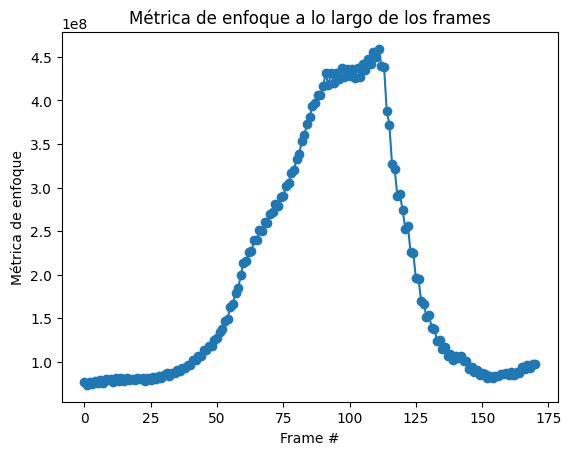

In [564]:
import matplotlib.pyplot as plt

plt.plot(sharpness_values, marker='o')
plt.title('Métrica de enfoque a lo largo de los frames')
plt.xlabel('Frame #')
plt.ylabel('Métrica de enfoque')
plt.show()

- Graficar sobre el video marcando frames enfocados y desenfocados:

In [572]:
# Cargar el video formateado
video_path = 'Material_TPs\\TP2\\focus_video.mov'
cap = cv.VideoCapture(video_path)


In [573]:
ret, frame = cap.read()

rows, cols, _ = frame.shape

# Definir la ROI en el centro del frame
roi_percentage = 1  # Porcentaje del área total del frame que ocupará la ROI
roi_w = int(cols * roi_percentage)  # Ancho de la ROI
roi_h = int(rows * roi_percentage)  # Alto de la ROI

# Coordenadas de la esquina superior izquierda de la ROI
start_col = (cols - roi_w) // 2
start_row = (rows - roi_h) // 2

In [574]:
max_value = max(sharpness_values) - 10
max_value

np.float64(459174068.7252383)

In [575]:
# Leer el primer frame para obtener las dimensiones del video
ret, frame = cap.read()
if ret:
    rows, cols, _ = frame.shape  # Obtener dimensiones del frame (alto, ancho, canales)
else:
    raise ValueError("No se pudo leer el primer frame del video.")

cap.set(cv.CAP_PROP_POS_FRAMES, 0)  # Resetear al primer frame

output_video = cv.VideoWriter('1_output_frame.avi', cv.VideoWriter_fourcc(*'XVID'), 20.0, (cols, rows))


for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    
    sharpness = sharpness_metric(frame)
    
    if sharpness >= max_value:
        color = (0, 255, 0)  # Verde para frames con máximo enfoque
        print(sharpness)
    else:
        color = (0, 0, 255)  # Rojo para frames desenfocados
    
    cv.rectangle(frame, (start_col, start_row), (start_col+roi_w, start_row+roi_h), color, 2)
    
    output_video.write(frame)

cap.release()
output_video.release()



459174078.7252383


ii- Medición sobre una Región de interés ubicada en el medio (ROI):

In [576]:
# Cargar el video
video_path = 'Material_TPs\\TP2\\focus_video.mov'
cap = cv.VideoCapture(video_path)

# Verificar si el video se cargó correctamente
if not cap.isOpened():
    print("Error al cargar el video")
else:
    print("Video cargado correctamente")

# Obtener la cantidad de frames
frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
print(f"Total de frames en el video: {frame_count}")


Video cargado correctamente
Total de frames en el video: 171


In [577]:
def sharpness_metric_roi(image, roi_scale=0.05):
    # Convertir la imagen a escala de grises
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Calcular las dimensiones de la ROI
    rows, cols = gray_image.shape
    roi_h, roi_w = int(rows * roi_scale), int(cols * roi_scale)
    start_row, start_col = (rows - roi_h) // 2, (cols - roi_w) // 2
    roi = gray_image[start_row:start_row + roi_h, start_col:start_col + roi_w]

    # Aplicar la transformada de Fourier a la ROI
    f_transform = np.fft.fft2(roi)
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.abs(f_transform_shifted)

    # Definir y aplicar la máscara de alta frecuencia
    crow, ccol = roi_h // 2, roi_w // 2
    mask = np.ones((roi_h, roi_w), np.uint8)
    r = 10  # Radio para las componentes de baja frecuencia
    mask[crow - r:crow + r, ccol - r:ccol + r] = 0
    high_freq_magnitude = magnitude_spectrum * mask

    # Calcular la métrica de nitidez
    sharpness_value = np.sum(high_freq_magnitude)

    return sharpness_value



In [578]:
# Medir la nitidez en la ROI para todos los frames
sharpness_values_roi = []

cap.set(cv.CAP_PROP_POS_FRAMES, 0)  # Ir al primer frame

for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break

    sharpness = sharpness_metric_roi(frame, roi_scale=0.05)
    sharpness_values_roi.append(sharpness)

    print(f"Frame {i+1}/{frame_count}, ROI Sharpness: {sharpness}")


Frame 1/171, ROI Sharpness: 50169.8509298654
Frame 2/171, ROI Sharpness: 48428.845810725325
Frame 3/171, ROI Sharpness: 47821.85018394103
Frame 4/171, ROI Sharpness: 45799.01238171459
Frame 5/171, ROI Sharpness: 45867.4484407015
Frame 6/171, ROI Sharpness: 46363.09535512078
Frame 7/171, ROI Sharpness: 49147.16952772775
Frame 8/171, ROI Sharpness: 50314.87117419727
Frame 9/171, ROI Sharpness: 51853.6008390905
Frame 10/171, ROI Sharpness: 52633.16469867409
Frame 11/171, ROI Sharpness: 52946.66071404434
Frame 12/171, ROI Sharpness: 52447.28425156184
Frame 13/171, ROI Sharpness: 53368.33285000824
Frame 14/171, ROI Sharpness: 54234.51374473786
Frame 15/171, ROI Sharpness: 55388.486712508646
Frame 16/171, ROI Sharpness: 55374.16426438508
Frame 17/171, ROI Sharpness: 55918.06687137201
Frame 18/171, ROI Sharpness: 56596.9451613796
Frame 19/171, ROI Sharpness: 56189.17032526257
Frame 20/171, ROI Sharpness: 56114.75967226084
Frame 21/171, ROI Sharpness: 56122.92139118913
Frame 22/171, ROI Sharpn

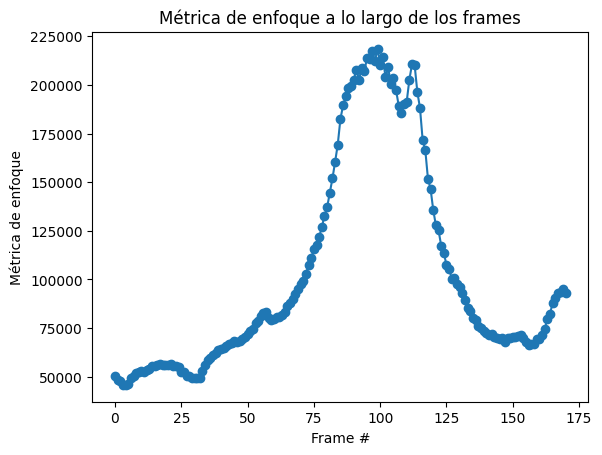

In [579]:
import matplotlib.pyplot as plt

plt.plot(sharpness_values_roi, marker='o')
plt.title('Métrica de enfoque a lo largo de los frames')
plt.xlabel('Frame #')
plt.ylabel('Métrica de enfoque')
plt.show()

In [585]:
# Cargar el video formateado
video_path = 'Material_TPs\\TP2\\focus_video.mov'
cap = cv.VideoCapture(video_path)

In [586]:
# Obtener filas y columnas de un frame
ret, frame = cap.read()
rows, cols, _ = frame.shape

# Definir la ROI en el centro del frame
roi_percentage = 0.1  # Porcentaje del área total del frame que ocupará la ROI
roi_w = int(cols * roi_percentage)  # Ancho de la ROI
roi_h = int(rows * roi_percentage)  # Alto de la ROI

# Coordenadas de la esquina superior izquierda de la ROI
start_col = (cols - roi_w) // 2
start_row = (rows - roi_h) // 2

In [587]:
max_value = max(sharpness_values_roi) - 10
max_value

np.float64(218470.08808024626)

In [588]:
# Leer el primer frame para obtener las dimensiones del video
ret, frame = cap.read()
if ret:
    rows, cols, _ = frame.shape  # Obtener dimensiones del frame (alto, ancho, canales)
else:
    raise ValueError("No se pudo leer el primer frame del video.")

cap.set(cv.CAP_PROP_POS_FRAMES, 0)  # Resetear al primer frame

output_video = cv.VideoWriter('2_output_roi.avi', cv.VideoWriter_fourcc(*'XVID'), 20.0, (cols, rows))


for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    
    sharpness = sharpness_metric_roi(frame)
    
    if sharpness >= max_value:
        color = (0, 255, 0)  # Verde para frames con máximo enfoque
        print(sharpness)
    else:
        color = (0, 0, 255)  # Rojo para frames desenfocados
    
    cv.rectangle(frame, (start_col, start_row), (start_col+roi_w, start_row+roi_h), color, 2)
    
    output_video.write(frame)

cap.release()
output_video.release()



218480.08808024626


Medir el enfoque utilizando una matriz de NxM regiones:

In [589]:
# Cargar el video formateado
video_path = 'Material_TPs\\TP2\\focus_video.mov'
cap = cv.VideoCapture(video_path)

In [590]:
def sharpness_metric_grid(image, N, M, cell_h, cell_w):
    rows, cols, _ = image.shape
    sharpness_total = 0
    
    for i in range(N):
        for j in range(M):
            # Calcular la posición de cada celda
            start_row = (i * (rows // N)) + 30
            end_row = start_row + cell_h
            start_col = (j * (cols // M)) + 30
            end_col = start_col + cell_w
            
            # Asegurarse de que las celdas no se salgan del frame
            if end_row > rows:
                end_row = rows
            if end_col > cols:
                end_col = cols
            
            roi = image[start_row:end_row, start_col:end_col]
            sharpness_total += sharpness_metric(roi)
    
    return sharpness_total / (N * M)

sharpness_values_grid = []

cap.set(cv.CAP_PROP_POS_FRAMES, 0)  # Resetear al primer frame

N, M = 3, 3  # Definir el número de filas y columnas
cell_h, cell_w = 50, 100  # Definir el alto y ancho de las celdas arbitrariamente

for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    
    sharpness = sharpness_metric_grid(frame, N, M, cell_h, cell_w)  # Usar la función con celdas rectangulares
    sharpness_values_grid.append(sharpness)
    
    print(f"Frame {i+1}/{frame_count}, Sharpness (Grid): {sharpness}")

cap.release()


Frame 1/171, Sharpness (Grid): 716370.2341075041
Frame 2/171, Sharpness (Grid): 714468.6500356537
Frame 3/171, Sharpness (Grid): 721512.1187797523
Frame 4/171, Sharpness (Grid): 718702.0795319126
Frame 5/171, Sharpness (Grid): 728486.9438779609
Frame 6/171, Sharpness (Grid): 721149.9522142294
Frame 7/171, Sharpness (Grid): 726038.8377643018
Frame 8/171, Sharpness (Grid): 720196.1423975996
Frame 9/171, Sharpness (Grid): 721717.2954441266
Frame 10/171, Sharpness (Grid): 716123.6452855215
Frame 11/171, Sharpness (Grid): 717808.5774709684
Frame 12/171, Sharpness (Grid): 709374.0780296023
Frame 13/171, Sharpness (Grid): 713077.9674794977
Frame 14/171, Sharpness (Grid): 705345.2682268923
Frame 15/171, Sharpness (Grid): 707084.1364649325
Frame 16/171, Sharpness (Grid): 699464.3958319945
Frame 17/171, Sharpness (Grid): 705438.5966907642
Frame 18/171, Sharpness (Grid): 700033.9980870436
Frame 19/171, Sharpness (Grid): 710120.7929166765
Frame 20/171, Sharpness (Grid): 706599.577272042
Frame 21/1

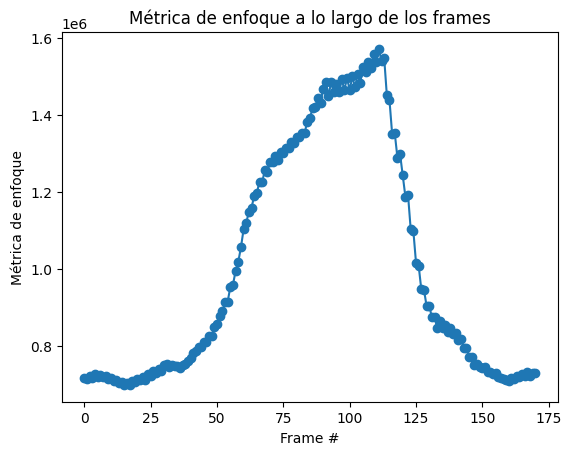

In [591]:
plt.plot(sharpness_values_grid, marker='o')
plt.title('Métrica de enfoque a lo largo de los frames')
plt.xlabel('Frame #')
plt.ylabel('Métrica de enfoque')
plt.show()

- Marcar enfoque el video:


In [592]:
# Cargar el video formateado
video_path = 'Material_TPs\\TP2\\focus_video.mov'
cap = cv.VideoCapture(video_path)


In [593]:
# Obtener filas y columnas de un frame
ret, frame = cap.read()
if not ret:
    raise ValueError("No se pudo leer el primer frame del video.")
rows, cols, _ = frame.shape  # Obtener dimensiones del frame (alto, ancho, canales)

# Definir la matriz de enfoque (N x M)
N, M = 3, 3  # Número de filas y columnas en la matriz

# Dimensiones de cada celda en la matriz
cell_h = rows // N  # Alto de cada celda
cell_w = cols // M  # Ancho de cada celda

# Recorrer cada celda en la matriz
for n in range(N):
    for m in range(M):
        # Coordenadas de la esquina superior izquierda de la celda
        start_col = (m * cell_w) + 30
        start_row = (n * cell_h) + 30
        
        # Coordenadas de la esquina inferior derecha de la celda
        end_col = start_col + cell_w
        end_row = start_row + cell_h

In [594]:
max_value = max(sharpness_values_grid) - 10
max_value

np.float64(1571878.806348818)

In [595]:
# Leer el primer frame para obtener las dimensiones del video
ret, frame = cap.read()
if ret:
    rows, cols, _ = frame.shape  # Obtener dimensiones del frame (alto, ancho, canales)
else:
    raise ValueError("No se pudo leer el primer frame del video.")

cap.set(cv.CAP_PROP_POS_FRAMES, 0)  # Resetear al primer frame

# Definir la matriz de enfoque (N x M)
N, M = 3, 3  # Número de filas y columnas en la matriz

# Dimensiones arbitrarias de cada celda en la matriz
cell_h = 50  # Alto de cada celda (puede ajustar este valor según sea necesario)
cell_w = 100  # Ancho de cada celda (puede ajustar este valor según sea necesario)

# Crear el objeto para escribir el video de salida
output_video = cv.VideoWriter('3_output_grid.avi', cv.VideoWriter_fourcc(*'XVID'), 20.0, (cols, rows))

# Procesar cada frame del video
for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    
    # Calcular la métrica de nitidez usando la matriz NxM
    sharpness = sharpness_metric_grid(frame, N, M, cell_h, cell_w)
    
    # Verificar si es el frame con el máximo enfoque
    if sharpness >= max_value:
        color = (0, 255, 0)  # Verde para frames con máximo enfoque
        print(sharpness)
    else:
        color = (0, 0, 255)  # Rojo para frames desenfocados
    
    # Dibujar los rectángulos de la matriz NxM sobre el frame
    for n in range(N):
        for m in range(M):
            # Calcular las posiciones de cada celda
            start_col = (m * (cols // M)) + 30
            start_row = (n * (rows // N)) + 30
            end_col = start_col + cell_w
            end_row = start_row + cell_h
            
            # Asegurarse de que los rectángulos no se salgan del frame
            if end_col > cols:
                end_col = cols
            if end_row > rows:
                end_row = rows
            
            cv.rectangle(frame, (start_col, start_row), (end_col, end_row), color, 2)
    
    # Escribir el frame procesado en el video de salida
    output_video.write(frame)

cap.release()
output_video.release()


1571888.806348818


Cambiar la métrica de enfoque eligiendo uno de los algoritmos explicados en el apéndice de: Analysis of focus measure operators in shapefrom focus, en este caso la métrica será Variance of Laplacian:

In [596]:
def variance_of_laplacian(image):
    # Convertir la imagen a escala de grises
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # Aplicar la Laplaciana
    laplacian = cv.Laplacian(gray_image, cv.CV_64F)
    
    # Calcular la varianza de la Laplaciana
    variance = laplacian.var()
    
    return variance

In [597]:
# Cargar el video formateado
video_path = 'Material_TPs\\TP2\\focus_video.mov'
cap = cv.VideoCapture(video_path)


In [598]:
# Obtener filas y columnas de un frame
ret, frame = cap.read()
if not ret:
    raise ValueError("No se pudo leer el primer frame del video.")
rows, cols, _ = frame.shape  # Obtener dimensiones del frame (alto, ancho, canales)

# Definir la matriz de enfoque (N x M)
N, M = 3, 3  # Número de filas y columnas en la matriz

# Dimensiones de cada celda en la matriz
cell_h = rows // N  # Alto de cada celda
cell_w = cols // M  # Ancho de cada celda

# Recorrer cada celda en la matriz
for n in range(N):
    for m in range(M):
        # Coordenadas de la esquina superior izquierda de la celda
        start_col = (m * cell_w) + 30
        start_row = (n * cell_h) + 30

        # Coordenadas de la esquina inferior derecha de la celda
        end_col = start_col + cell_w
        end_row = start_row + cell_h

In [599]:
def sharpness_metric_grid_custom(image, N, M, cell_h, cell_w):
    rows, cols, _ = image.shape
    sharpness_total = 0
    
    for i in range(N):
        for j in range(M):
            # Calcular la posición de cada celda
            start_row = (i * (rows // N)) + 30
            end_row = start_row + cell_h
            start_col = (j * (cols // M)) + 30
            end_col = start_col + cell_w
            
            # Asegurarse de que las celdas no se salgan del frame
            if end_row > rows:
                end_row = rows
            if end_col > cols:
                end_col = cols
            
            roi = image[start_row:end_row, start_col:end_col]
            sharpness_total += variance_of_laplacian(roi)
    
    return sharpness_total / (N * M)

sharpness_values_grid = []

cap.set(cv.CAP_PROP_POS_FRAMES, 0)  # Resetear al primer frame

N, M = 3, 3  # Definir el número de filas y columnas
cell_h, cell_w = 50, 100  # Definir el alto y ancho de las celdas arbitrariamente

for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    
    sharpness = sharpness_metric_grid_custom(frame, N, M, cell_h, cell_w)  # Usar la función con celdas rectangulares
    sharpness_values_grid.append(sharpness)
    
    print(f"Frame {i+1}/{frame_count}, Sharpness (Grid): {sharpness}")

cap.release()


Frame 1/171, Sharpness (Grid): 2.2119226622222223
Frame 2/171, Sharpness (Grid): 2.143561262222222
Frame 3/171, Sharpness (Grid): 2.4093534933333336
Frame 4/171, Sharpness (Grid): 2.36455728
Frame 5/171, Sharpness (Grid): 2.7573071111111114
Frame 6/171, Sharpness (Grid): 2.6640798844444444
Frame 7/171, Sharpness (Grid): 2.8613675599999997
Frame 8/171, Sharpness (Grid): 2.74951288
Frame 9/171, Sharpness (Grid): 3.006937146666666
Frame 10/171, Sharpness (Grid): 2.9654445955555553
Frame 11/171, Sharpness (Grid): 3.135352053333333
Frame 12/171, Sharpness (Grid): 2.9252205066666663
Frame 13/171, Sharpness (Grid): 3.1811446177777776
Frame 14/171, Sharpness (Grid): 2.890947466666667
Frame 15/171, Sharpness (Grid): 3.1217181955555557
Frame 16/171, Sharpness (Grid): 2.8618454088888887
Frame 17/171, Sharpness (Grid): 3.149857053333333
Frame 18/171, Sharpness (Grid): 2.8529021822222216
Frame 19/171, Sharpness (Grid): 3.228675013333333
Frame 20/171, Sharpness (Grid): 2.9464075733333335
Frame 21/17

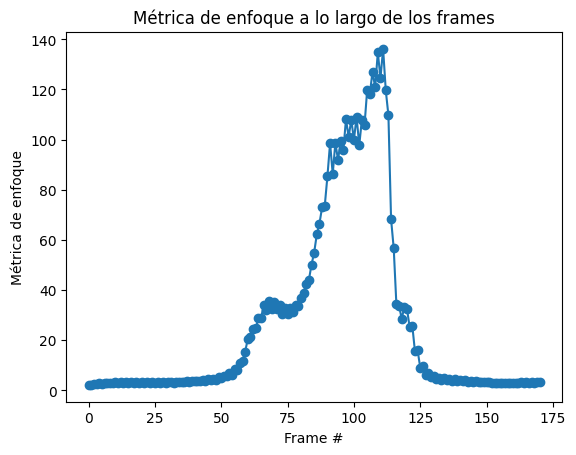

In [600]:
plt.plot(sharpness_values_grid, marker='o')
plt.title('Métrica de enfoque a lo largo de los frames')
plt.xlabel('Frame #')
plt.ylabel('Métrica de enfoque')
plt.show()

In [601]:
# Cargar el video formateado
video_path = 'Material_TPs\\TP2\\focus_video.mov'
cap = cv.VideoCapture(video_path)


In [602]:
max_value = max(sharpness_values_grid)
max_value

np.float64(136.17960295111112)

In [603]:
# Cargar el video formateado
video_path = 'Material_TPs\\TP2\\focus_video.mov'
cap = cv.VideoCapture(video_path)

In [604]:
# Leer el primer frame para obtener las dimensiones del video
ret, frame = cap.read()
if ret:
    rows, cols, _ = frame.shape  # Obtener dimensiones del frame (alto, ancho, canales)
else:
    raise ValueError("No se pudo leer el primer frame del video.")

cap.set(cv.CAP_PROP_POS_FRAMES, 0)  # Resetear al primer frame

# Definir la matriz de enfoque (N x M)
N, M = 3, 3  # Número de filas y columnas en la matriz

# Dimensiones arbitrarias de cada celda en la matriz
cell_h = 50  # Alto de cada celda (puede ajustar este valor según sea necesario)
cell_w = 100  # Ancho de cada celda (puede ajustar este valor según sea necesario)

# Crear el objeto para escribir el video de salida
output_video = cv.VideoWriter('4_output_grid_volaplacian.avi', cv.VideoWriter_fourcc(*'XVID'), 20.0, (cols, rows))

# Procesar cada frame del video
for i in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    
    # Calcular la métrica de nitidez usando la matriz NxM
    sharpness = sharpness_metric_grid_custom(frame, N, M, cell_h, cell_w)
    
    # Verificar si es el frame con el máximo enfoque
    if sharpness >= max_value:
        color = (0, 255, 0)  # Verde para frames con máximo enfoque
        print(sharpness)
    else:
        color = (0, 0, 255)  # Rojo para frames desenfocados
    
    # Dibujar los rectángulos de la matriz NxM sobre el frame
    for n in range(N):
        for m in range(M):
            # Calcular las posiciones de cada celda
            start_col = (m * (cols // M)) + 30
            start_row = (n * (rows // N)) + 30
            end_col = start_col + cell_w
            end_row = start_row + cell_h
            
            # Asegurarse de que los rectángulos no se salgan del frame
            if end_col > cols:
                end_col = cols
            if end_row > rows:
                end_row = rows
            
            cv.rectangle(frame, (start_col, start_row), (end_col, end_row), color, 2)
    
    # Escribir el frame procesado en el video de salida
    output_video.write(frame)

cap.release()
output_video.release()


136.17960295111112
